In [8]:
from pathlib import Path
from src import constants
import pickle
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import tsfresh
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
path_data = Path(constants.TIMESERIES_FEATURES_EXTRACTED)

In [2]:
# Read data
X = pd.read_pickle(path_data / 'X.pkl')

# Load the results
with open(str(path_data / 'sfs_backward.pkl'), 'rb') as handle:
    sfs_backward = pickle.load(handle)

with open(str(path_data / 'sfs_forward.pkl'), 'rb') as handle:
    sfs_forward = pickle.load(handle)

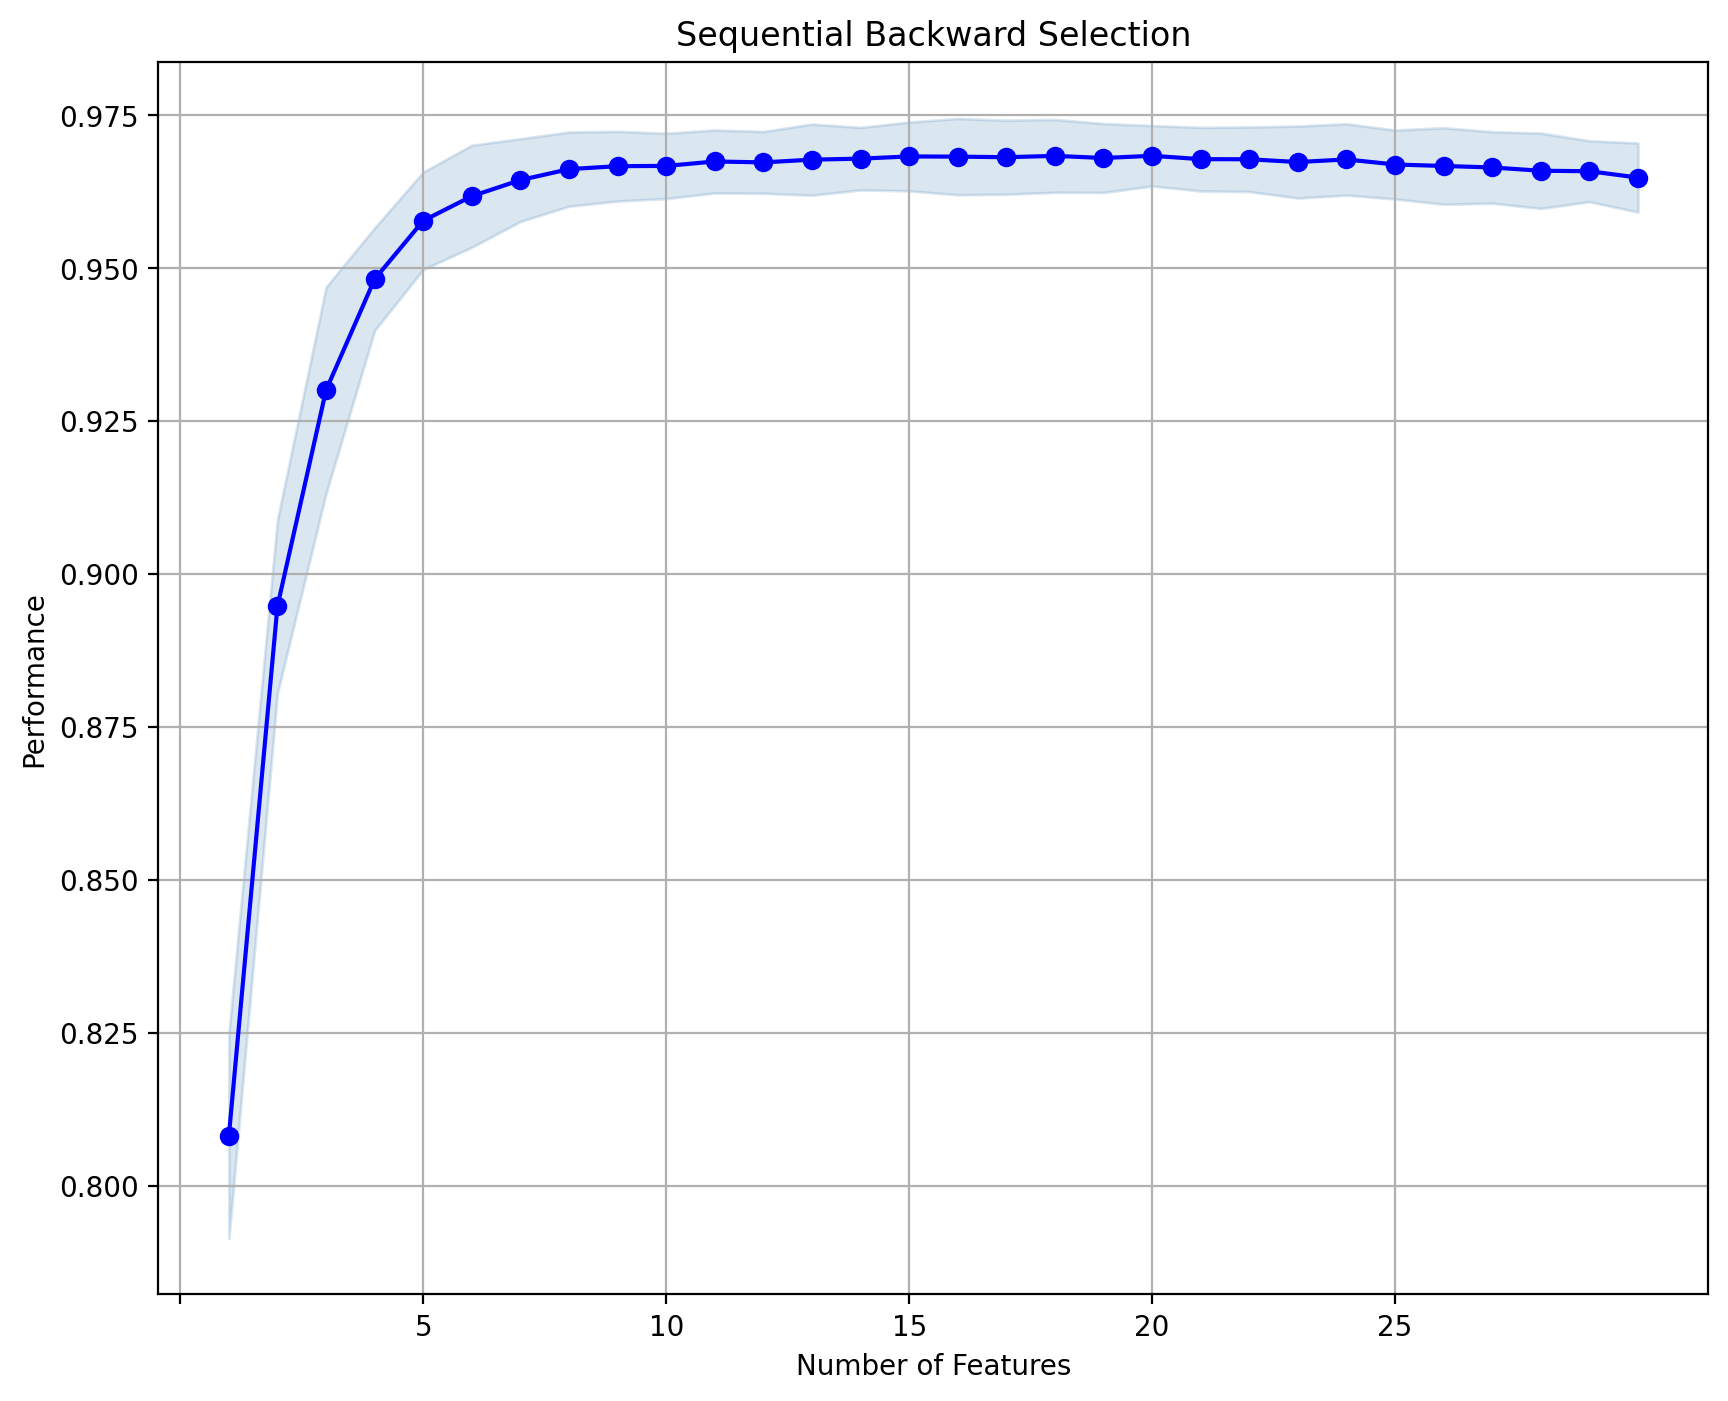

In [9]:
# Plot the results
plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev',figsize=(10, 8))
plt.title('Sequential Backward Selection')
plt.xticks(np.arange(0, 30, 5))
plt.grid()
#plt.savefig(str(report_path / 'feature_selection_backward.pdf'), bbox_inches='tight')
plt.show()

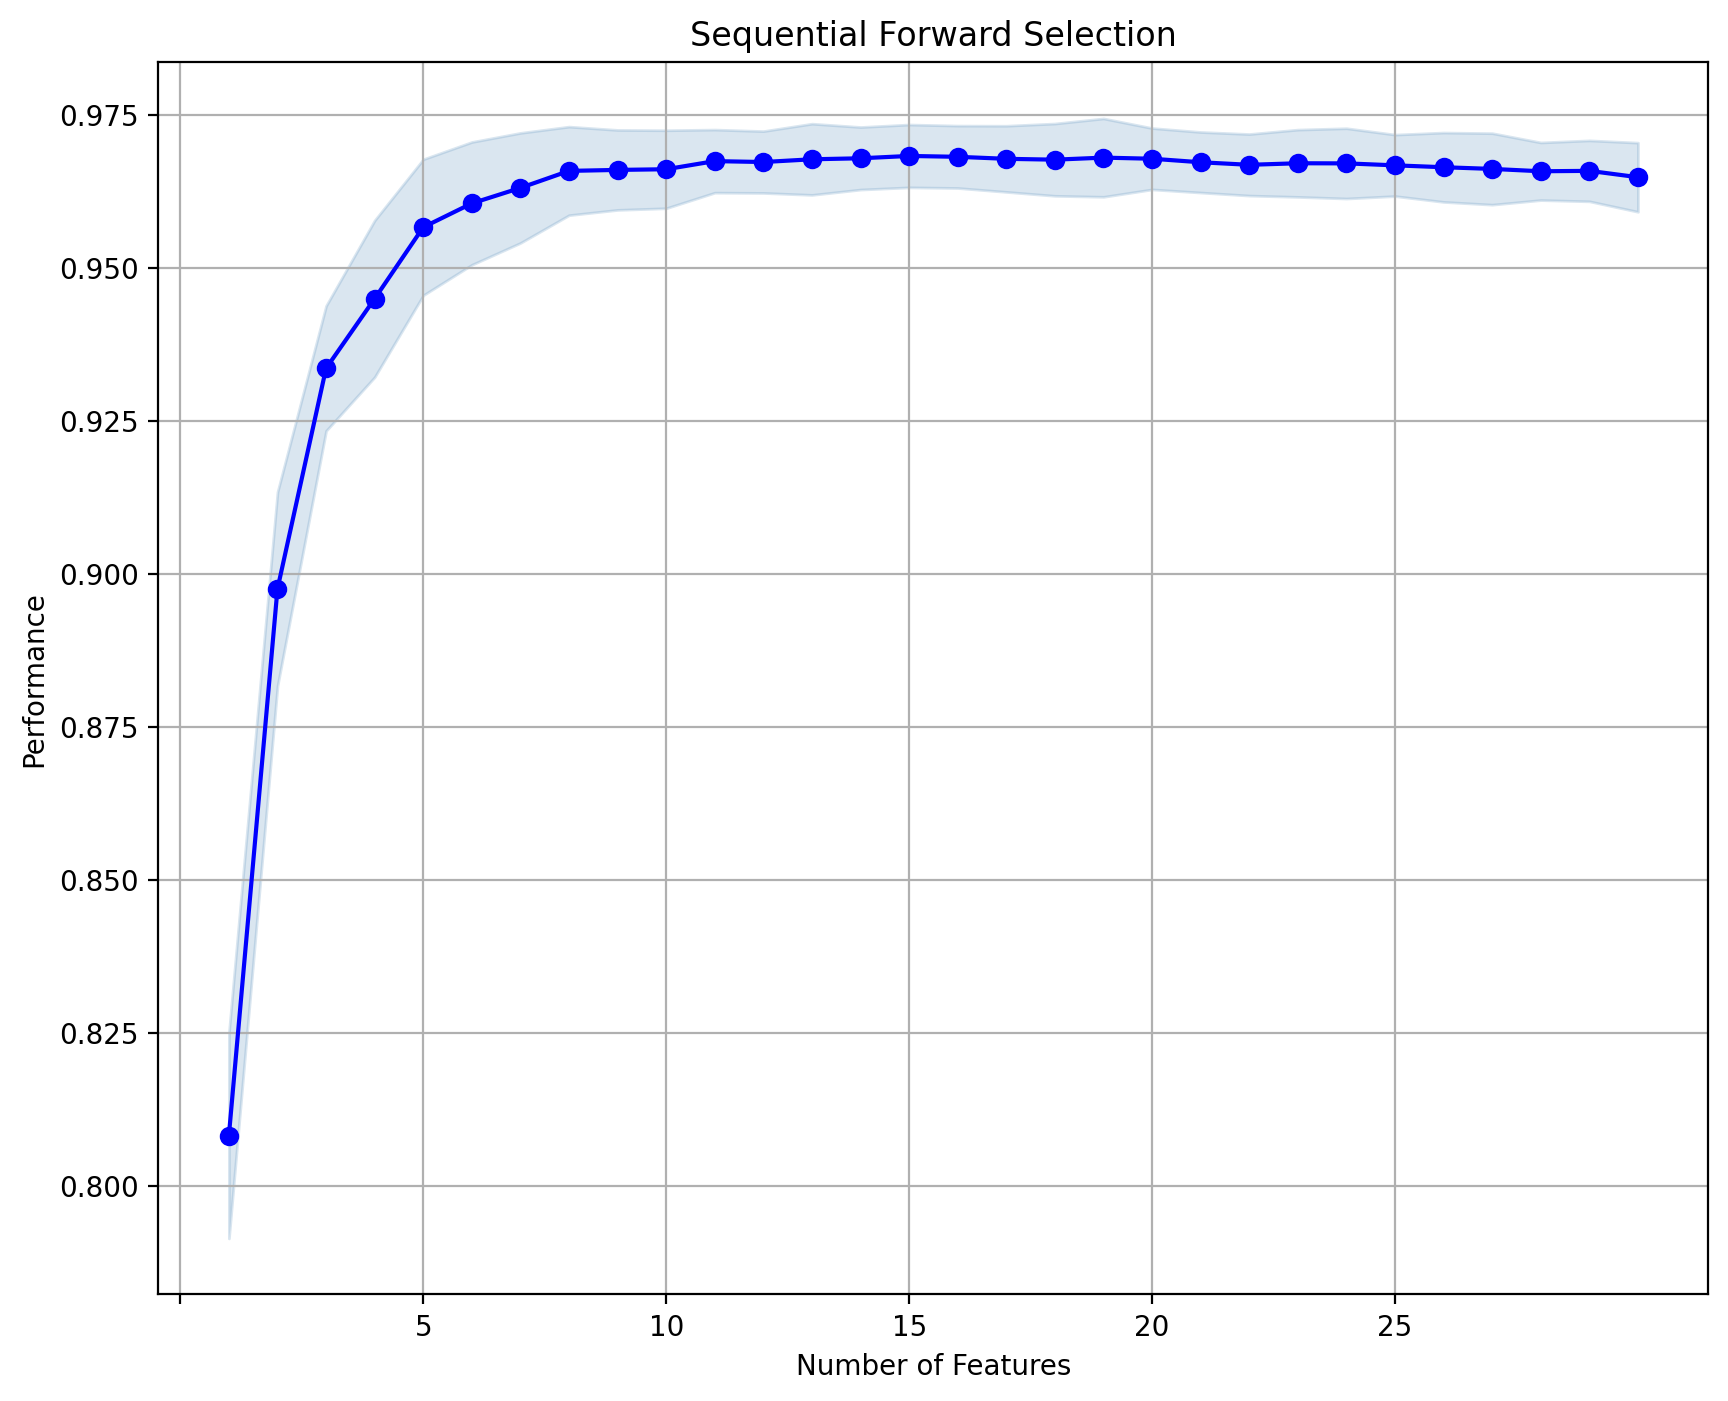

In [10]:
# Plot the results
plot_sfs(sfs_forward.get_metric_dict(), kind='std_dev',figsize=(10, 8))
plt.title('Sequential Forward Selection')
plt.xticks(np.arange(0, 30, 5))
plt.grid()
#plt.savefig(str(report_path / 'feature_selection_forward.pdf'), bbox_inches='tight')
plt.show()

In [7]:
final_features = list(
    set(sfs_backward.subsets_[7]['feature_names']) |
    set(sfs_forward.subsets_[7]['feature_names'])
    )

print(f'Number of final features: {len(final_features)}')
for feature in final_features:
    print(feature)

Number of final features: 9
2__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)
1__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)
2__quantile__q_0.1
25__variance
2__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2
2__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"min"
49__lempel_ziv_complexity__bins_5
2__number_crossing_m__m_0
2__minimum


In [15]:
# Save final_features
with open(str(path_data / 'final_features.pkl'), "wb") as f:
    pickle.dump(final_features, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save the extraction settings for the realtime application

# Construct the timeseries extraction settings
kind_to_fc_parameters = tsfresh.feature_extraction.settings.from_columns(
    X[final_features]
)

# Turn all keys to integers in kind_to_fc_parameters
kind_to_fc_parameters = {int(k): v for k, v in kind_to_fc_parameters.items()}

# Save the settings object
with open(str(path_data / 'kind_to_fc_parameters.pkl'), "wb") as f:
    pickle.dump(kind_to_fc_parameters, f, protocol=pickle.HIGHEST_PROTOCOL)